<a href="https://colab.research.google.com/github/vineelabaisa9119/SUV/blob/main/SUV_purchase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/SUV_Purchase (1).csv')

In [4]:
#the dataset
#convert gender's string value in binary
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
x1=np.array(df[['Gender']])
x2=np.array(df[['Age']])
x3=np.array(df[['EstimatedSalary']])
y=np.array(df[['Purchased']])

In [ ]:
from numpy.lib.shape_base import column_stack
x=np.concatenate([x1,x2,x3],axis=1)
x
#if axis=0 each attribute get stored in a single column_stack
#if axis=0 each attribute get stored in a single list

array([['Male', 19, 19000],
       ['Male', 35, 20000],
       ['Female', 26, 43000],
       ...,
       ['Female', 50, 20000],
       ['Male', 36, 33000],
       ['Female', 49, 36000]], dtype=object)

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
#data processing
from sklearn import preprocessing 

#labelencodingg 
LE=preprocessing.LabelEncoder() 

#fitting it to our dataset 
df.Gender=LE.fit_transform(df.Gender)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


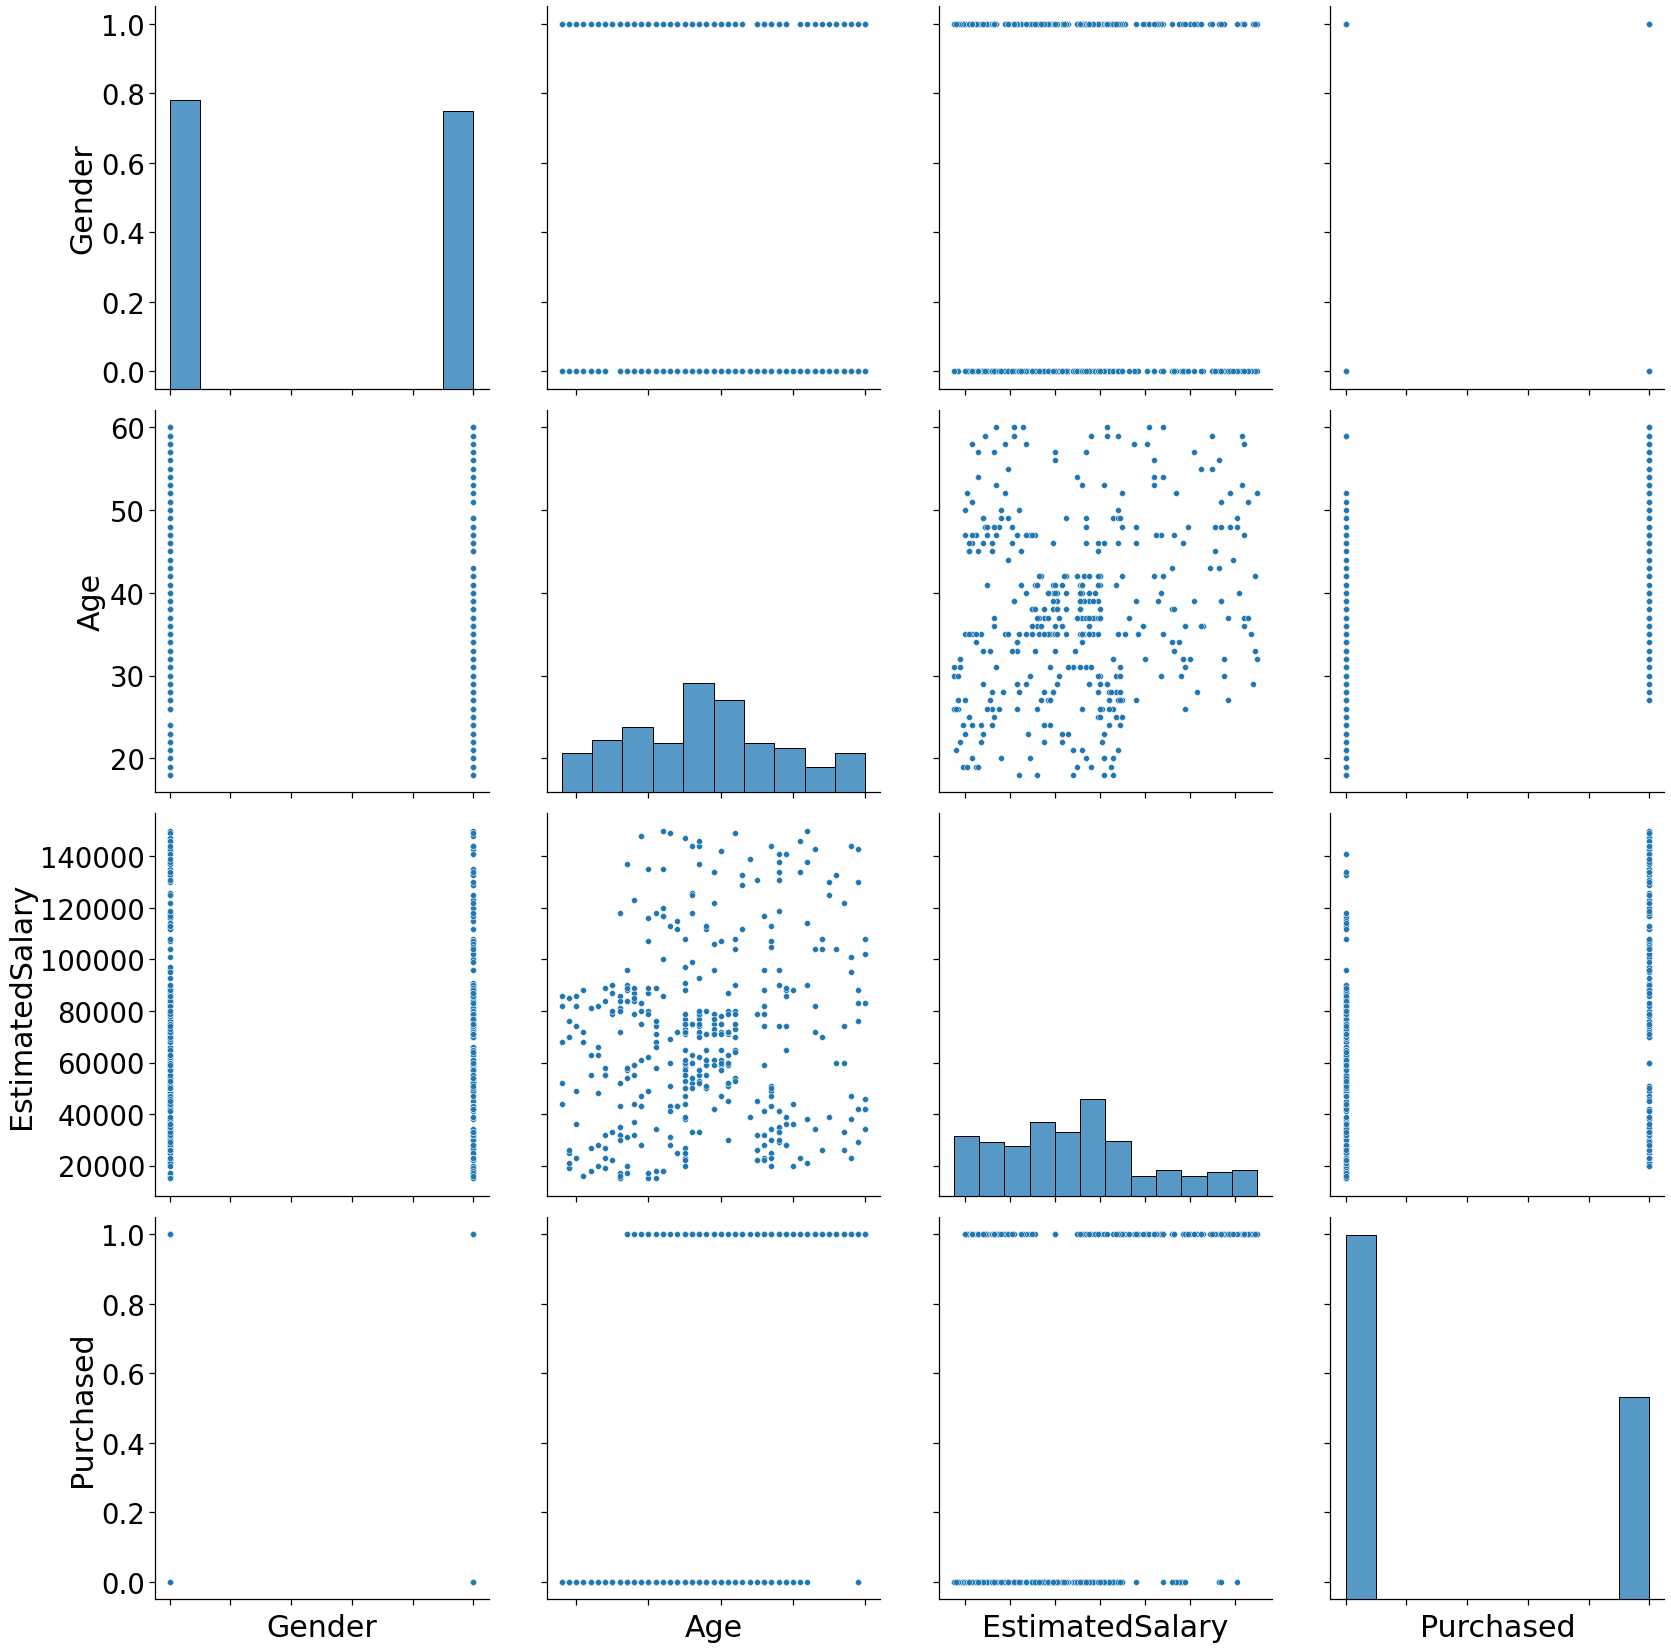

In [ ]:
#understanding the distribution with seaborn 
import seaborn as sns
with sns.plotting_context("notebook",font_scale=2.5):
  g = sns.pairplot(df[['Gender','Age','EstimatedSalary','Purchased']],palette='tab10',size=6)
  g.set(xticklabels=[]);

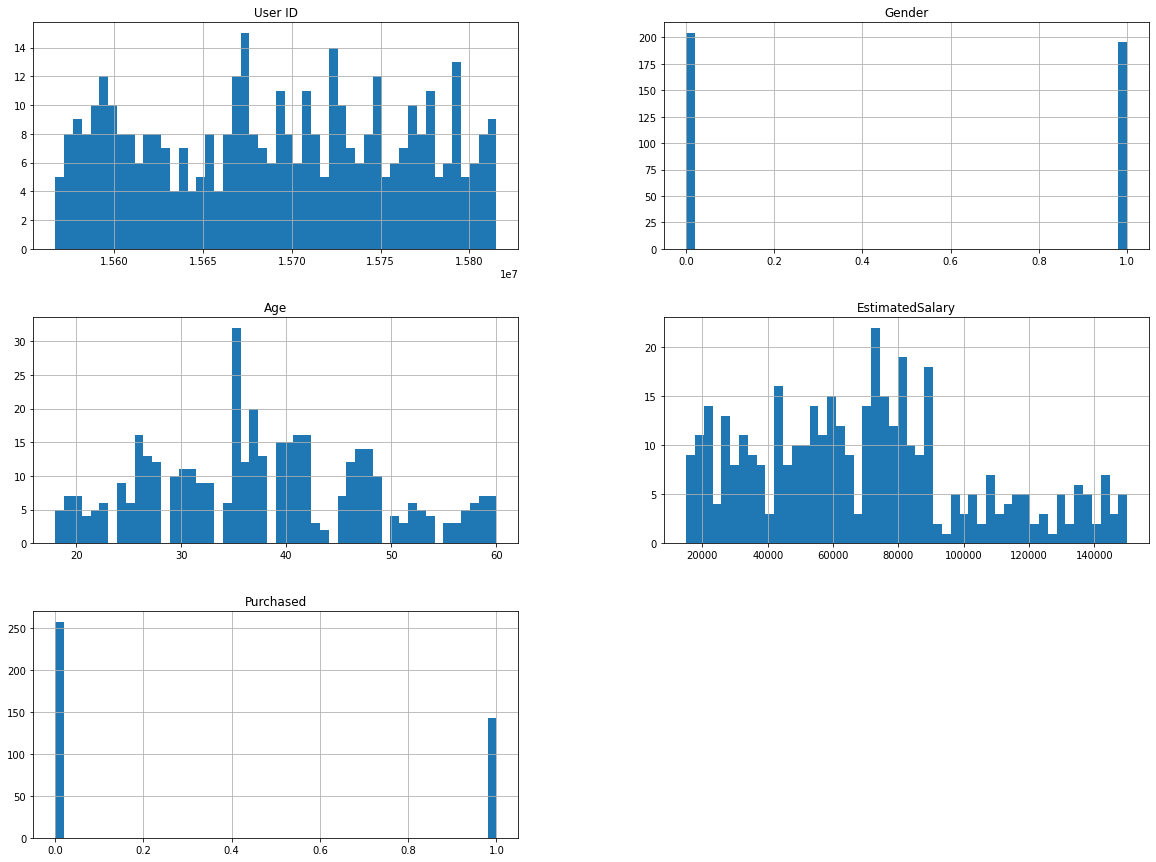

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
WIDTH  = 20
HEIGHT = 6

def plot_vs(frame, col1, col2, hue):
    plt.figure(figsize=(WIDTH, HEIGHT * 2))
    sns.scatterplot(data=frame, x=col1, y=col2, hue=hue)
    plt.title(f"Scatter plot | {col1} vs {col2}")
    plt.show()

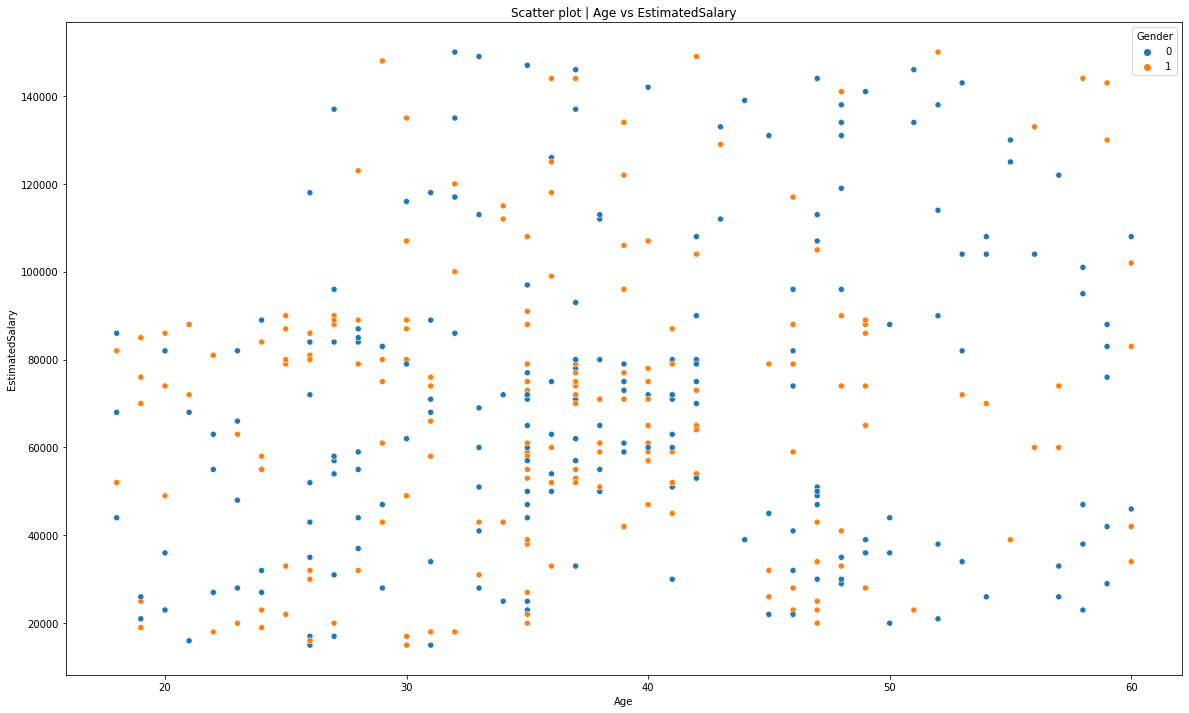

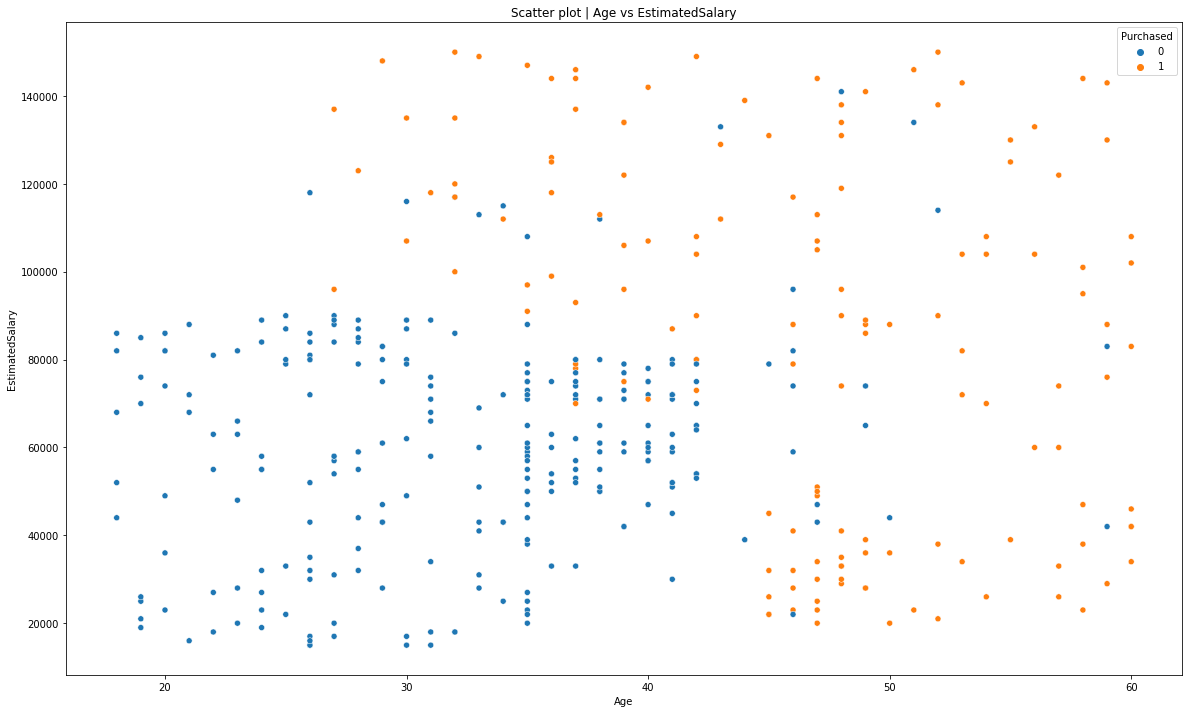

In [ ]:
plot_vs(df,'Age', 'EstimatedSalary', 'Gender')
plot_vs( df,'Age', 'EstimatedSalary', 'Purchased')

In [ ]:
#FROM GRAPH 2 OLD PEOPLE NO MATTER WHAT THEY BOUGHT THE CAR
#YOUTH ABOVE 80K SALARY BOUGHT THE CAR.

In [ ]:
#importing standard scalar from scikit-learn
from sklearn.preprocessing import StandardScaler
sst=StandardScaler()

#standardzing the xdata apat from the class column
data_scaled=df.iloc[:,:-1].values

data_scaled=sst.fit_transform(data_scaled)
data_scaled=pd.DataFrame(data_scaled)



#data_scaled=pd.DataFrame(sst.fit_transform(df.drop('Outbreak),axis=1))
#adding the class column back to datafram

In [ ]:
data_scaled.head()

,0,1,2,3
0,-0.936579,1.020204,-1.781797,-1.490046
1,1.668387,1.020204,-0.253587,-1.460681
2,-0.320877,-0.980196,-1.113206,-0.785290
3,-1.233692,-0.980196,-1.017692,-0.374182
4,1.571389,1.020204,-1.781797,0.183751


In [ ]:
data_scaled['Class']=df.Purchased

In [ ]:
data_scaled

,0,1,2,3,Class
0,-0.936579,1.020204,-1.781797,-1.490046,0
1,1.668387,1.020204,-0.253587,-1.460681,0
2,-0.320877,-0.980196,-1.113206,-0.785290,0
3,-1.233692,-0.980196,-1.017692,-0.374182,0
4,1.571389,1.020204,-1.781797,0.183751,0
...,...,...,...,...,...
395,0.004517,-0.980196,0.797057,-0.844019,1
396,0.203039,1.020204,1.274623,-1.372587,1
397,-0.520392,-0.980196,1.179110,-1.460681,1
398,0.886955,1.020204,-0.158074,-1.078938,0


In [ ]:
X=np.array(df[['Gender','EstimatedSalary','Age']])

In [ ]:
#loading the data
Y=np.array(df[['Purchased']])

In [ ]:
# EstimatedSalary : Outliers handling
df= df.drop(df.query("EstimatedSalary > 120000 and Purchased == 0").index)
# Age : Outliers handling
df = df.drop(df.query("Age > 55 and Purchased == 0").index)

In [ ]:
#splitting the dataset
#spliting he data set into train and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sst=StandardScaler()

#standardzing the xdata apat from the class column
#data_scaled=df.iloc[:,:-1].values

#data_scaled=sst.fit_transform(data_scaled)
#data_scaled=pd.DataFrame(data_scaled)

X_train = sst.fit_transform(X_train)
X_test = sst.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
print("Predicted value for training data:",model.score(X_train,Y_train))
print("Training accuracy:",model.score(X_train,Y_train)*100)

Predicted value for training data: 0.84375
Training accuracy: 84.375


In [ ]:
print("Predicted value for testing data:",model.score(X_test,Y_test))
print("Testing accuracy:",model.score(X_test,Y_test)*100)

Predicted value for testing data: 0.8125
Testing accuracy: 81.25


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(Y_test, y_pred)

print(cm)

accuracy_score(Y_test, y_pred)

[[45  3]
 [12 20]]


0.8125

In [ ]:
'''from matplotlib.colors import ListedColormap

X_set, y_set = data_scaled.inverse_transform(X_train), y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),

                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),

             alpha = 0.75, cmap = ListedColormap(('red', 'green'))) '''

'''plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):

    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Logistic Regression (Training set)')

plt.xlabel('Age')

plt.ylabel('Estimated Salary')

plt.legend()

plt.show()'''


"plt.xlim(X1.min(), X1.max())\n\nplt.ylim(X2.min(), X2.max())\n\nfor i, j in enumerate(np.unique(y_set)):\n\n    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)\n\nplt.title('Logistic Regression (Training set)')\n\nplt.xlabel('Age')\n\nplt.ylabel('Estimated Salary')\n\nplt.legend()\n\nplt.show()"